Imgs estaticas
1 - Escolher 4 imgs estaticas que aparecam as maos.
2 - Fazer o handtracking das maos.

Img dinamica
1 - Mudar as cores e tamanhos do controle de volume (mudar layout).

Texto para audio
1 - Usar pyttsx3 para ler texto em audio:
1.1 - Em portgues;
1.2 - Ingles.

# Realizar o handtracking das mãos em quatro imagens estáticas que aparecem as mãos

## Bibliotecas

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Lendo imagens

In [39]:
filepaths = [
    "images/hand001.jpg",
    "images/hand002.jpg",
    "images/hand003.jpg",
    "images/hand004.jpg",
    "images/hand005.jpg",
    "images/hand006.jpg",
    "images/hand007.jpg",
]

images = []

for filepath in filepaths:
    image = cv2.imread(filepath)

    width = 800
    height = 600
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    images.append(resized)

In [ ]:
!pip install mediapipe

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

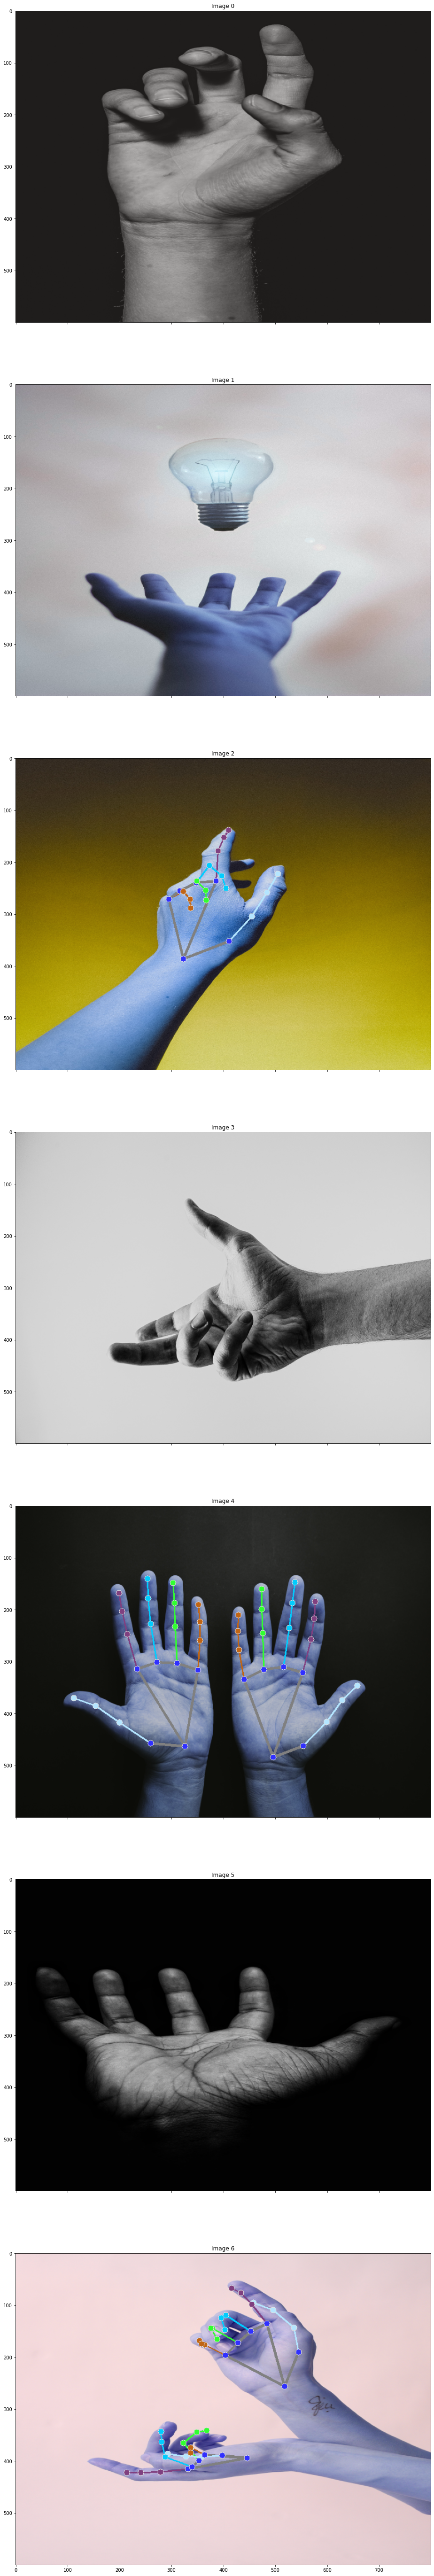

In [38]:
images_marked = []

f, axarr = plt.subplots(len(images), sharex=True, figsize=(100,100))

with mp_hands.Hands(
  model_complexity=0,
  min_detection_confidence=0.5,
  min_tracking_confidence=0.5) as hands:
  
  for index, image in enumerate(images):
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    
    axarr[index].set_title(f"Image {index}")
    axarr[index].imshow(image)

    images_marked.append(image)
    # Flip the image horizontally for a selfie-view display.
    # cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    # if cv2.waitKey(5) & 0xFF == 27:
    #       break

In [40]:
class handDetector():
    def __init__(self, mode = False, maxHands = 2, detectionCon = 0.5, trackCon = 0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon

        self.mpHands = mp.solutions.hands
        self.hands = self.mpHands.Hands(self.mode, self.maxHands, self.detectionCon, self.trackCon)
        self.mpDraw = mp.solutions.drawing_utils
        
    def findHands(self,img, draw = True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        # print(results.multi_hand_landmarks)

        if self.results.multi_hand_landmarks:
            for handLms in self.results.multi_hand_landmarks:
                if draw:
                    self.mpDraw.draw_landmarks(img, handLms, self.mpHands.HAND_CONNECTIONS)
        return img

    def findPosition(self, img, handNo = 0, draw = True):

        lmlist = []
        if self.results.multi_hand_landmarks:
            myHand = self.results.multi_hand_landmarks[handNo]
            for id, lm in enumerate(myHand.landmark):
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmlist.append([id, cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 3, (255, 0, 255), cv2.FILLED)
        return lmlist

def main():
    detector = handDetector()

    for img in images:
        img = detector.findHands(img)
        lmlist = detector.findPosition(img)

        cv2.imshow("Image", img)


if __name__ == "__main__":
    main()

TypeError: create_int(): incompatible function arguments. The following argument types are supported:
    1. (arg0: int) -> mediapipe.python._framework_bindings.packet.Packet

Invoked with: 0.5

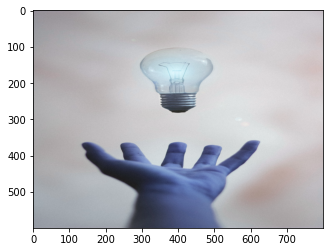

In [25]:
plt.imshow(images_marked[1])

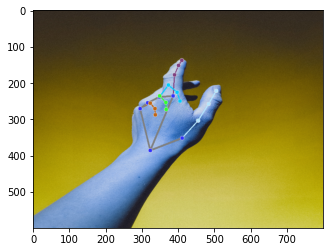

In [26]:
plt.imshow(images_marked[2])

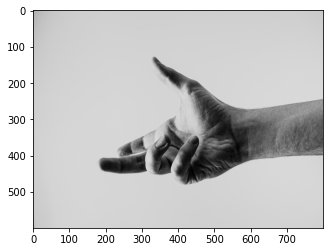

In [27]:
plt.imshow(images_marked[3])

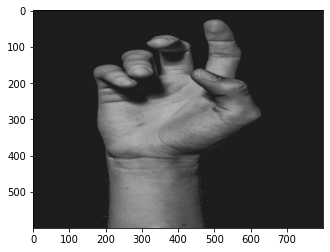

In [23]:
fig = plt.imshow(images_marked[0])

# fig = plt.figure()
# ax1 = fig.add_subplot(2,2,1)
# ax1.imshow(images_marked[0])
# ax2 = fig.add_subplot(2,2,2)
# ax2.imshow(images_marked[1])
# ax3 = fig.add_subplot(2,2,3)
# ax3.imshow(images_marked[2])
# ax4 = fig.add_subplot(2,2,4)
# ax4.imshow(images_marked[3])

plt.figure(figsize = (20, 10))

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(images_marked[0])
axs[0, 1].imshow(images_marked[1])
axs[1, 0].imshow(images_marked[2])
axs[1, 1].imshow(images_marked[3])

# plt.show()
# plt.subplot(1,4,1)
# # plt.title(f"{image_name}")
# plt.imshow(images_marked[0])
# plt.box(False)

# plt.subplot(1,4,2)
# # plt.title(f"{image_name} 90º")
# plt.imshow(images_marked[1])
# plt.box(False)

# plt.subplot(2,4,3)
# # plt.title(f"{image_name} 180º")
# plt.imshow(images_marked[2])
# plt.box(False)

# plt.subplot(2,4,4)
# # plt.title(f"{image_name} 270º")
# plt.imshow(images_marked[3])
# plt.box(False)

In [ ]:
!pip install mediapipe
!pip install comtypes

In [2]:
import mediapipe as mp
import cv2
from math import hypot
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
import numpy as np

ImportError: cannot import name 'COMError' from '_ctypes' (/usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so)

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [ ]:
cap = cv2.VideoCapture(0) #Checks for camera
 
mpHands = mp.solutions.hands #detects hand/finger
hands = mpHands.Hands()   #complete the initialization configuration of hands
mpDraw = mp.solutions.drawing_utils
 
#To access speaker through the library pycaw 
devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))
volbar=400
volper=0
 
volMin,volMax = volume.GetVolumeRange()[:2]
 
while True:
    success,img = cap.read() #If camera works capture an image
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert to rgb
    
    #Collection of gesture information
    results = hands.process(imgRGB) #completes the image processing.
 
    lmList = [] #empty list
    if results.multi_hand_landmarks: #list of all hands detected.
        #By accessing the list, we can get the information of each hand's corresponding flag bit
        for handlandmark in results.multi_hand_landmarks:
            for id,lm in enumerate(handlandmark.landmark): #adding counter and returning it
                # Get finger joint points
                h,w,_ = img.shape
                cx,cy = int(lm.x*w),int(lm.y*h)
                lmList.append([id,cx,cy]) #adding to the empty list 'lmList'
            mpDraw.draw_landmarks(img,handlandmark,mpHands.HAND_CONNECTIONS)
    
    if lmList != []:
        #getting the value at a point
                        #x      #y
        x1,y1 = lmList[4][1],lmList[4][2]  #thumb
        x2,y2 = lmList[8][1],lmList[8][2]  #index finger
        #creating circle at the tips of thumb and index finger
        cv2.circle(img,(x1,y1),13,(255,0,0),cv2.FILLED) #image #fingers #radius #rgb
        cv2.circle(img,(x2,y2),13,(255,0,0),cv2.FILLED) #image #fingers #radius #rgb
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),3)  #create a line b/w tips of index finger and thumb
 
        length = hypot(x2-x1,y2-y1) #distance b/w tips using hypotenuse
 # from numpy we find our length,by converting hand range in terms of volume range ie b/w -63.5 to 0
        vol = np.interp(length,[30,350],[volMin,volMax]) 
        volbar=np.interp(length,[30,350],[400,150])
        volper=np.interp(length,[30,350],[0,100])
        
        
        print(vol,int(length))
        volume.SetMasterVolumeLevel(vol, None)
        
        # Hand range 30 - 350
        # Volume range -63.5 - 0.0
        #creating volume bar for volume level 
        cv2.rectangle(img,(50,150),(85,400),(0,0,255),4) # vid ,initial position ,ending position ,rgb ,thickness
        cv2.rectangle(img,(50,int(volbar)),(85,400),(0,0,255),cv2.FILLED)
        cv2.putText(img,f"{int(volper)}%",(10,40),cv2.FONT_ITALIC,1,(0, 255, 98),3)
        #tell the volume percentage ,location,font of text,length,rgb color,thickness
    cv2.imshow('Image',img) #Show the video 
    if cv2.waitKey(1) & 0xff==ord(' '): #By using spacebar delay will stop
        break
        
cap.release()     #stop cam       
cv2.destroyAllWindows() #close window

NameError: name 'cv2' is not defined

# Mudar o layout (cores e tamanho) do controle de volume

# Usar a biblioteca pyttsx3 para ler texto em áudio em português e em inglês